# 探索变量间的关系
比统计更直观呢~

In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "regression")))
tips = pd.read_csv("D:/bigdata_github/Python_Course_by_Bokkin/course/class5_Seaborn/tips.csv") # 餐厅小费案例
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
np.random.seed(sum(map(ord, "regression")))

In [78]:
sum(map(ord, "regression"))

1089

In [77]:
list(map(ord, "regression"))

[114, 101, 103, 114, 101, 115, 115, 105, 111, 110]

In [76]:
ord('a')

97

In [74]:
np.random.seed(2019106)
np.random.rand(3,2)

array([[ 0.52162282,  0.46682414],
       [ 0.68483202,  0.62845597],
       [ 0.48845714,  0.99004716]])

In [5]:
sum(map(ord, "regression"))

1089

In [7]:
list(map(ord, "regression"))

[114, 101, 103, 114, 101, 115, 115, 105, 111, 110]

## 绘制线性回归模型
* 最简单的方式：散点图 + 线性回归 + 95%置信区间
* 小费收入与餐厅消费成正比

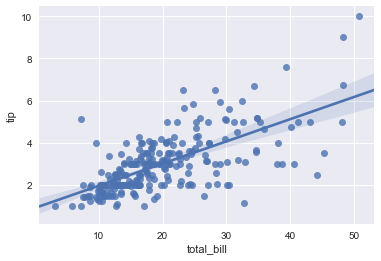

In [80]:
sns.regplot(x="total_bill", y="tip", data=tips)

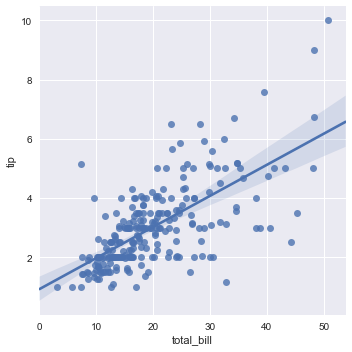

In [81]:
sns.lmplot(x="total_bill", y="tip", data=tips)

In [82]:
tips["total_bill"]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
5      25.29
6       8.77
7      26.88
8      15.04
9      14.78
10     10.27
11     35.26
12     15.42
13     18.43
14     14.83
15     21.58
16     10.33
17     16.29
18     16.97
19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
24     19.82
25     17.81
26     13.37
27     12.69
28     21.70
29     19.65
       ...  
214    28.17
215    12.90
216    28.15
217    11.59
218     7.74
219    30.14
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
227    20.45
228    13.28
229    22.12
230    24.01
231    15.69
232    11.61
233    10.77
234    15.53
235    10.07
236    12.60
237    32.83
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

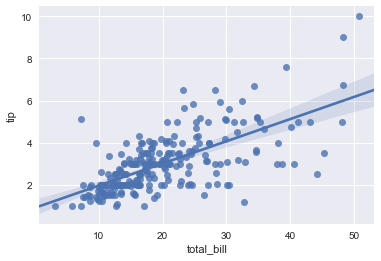

In [83]:
sns.regplot(x=tips["total_bill"], y=tips["tip"])

In [85]:
sns.lmplot(x=tips["total_bill"], y=tips["tip"])

TypeError: lmplot() missing 1 required positional argument: 'data'

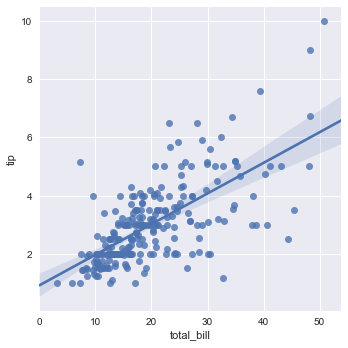

In [2]:
sns.lmplot(x="total_bill", y="tip", data=tips) # confidence interval

In [13]:
sns.lmplot(x=tips["total_bill"], y=tips["tip"])

TypeError: lmplot() missing 1 required positional argument: 'data'

对于变量离散取值，散点图就显得有些尴尬了。。。

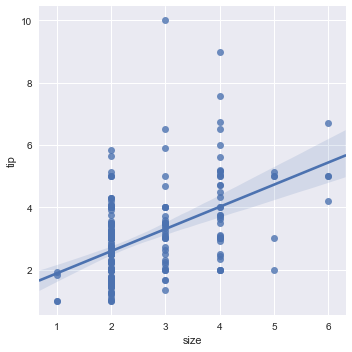

In [86]:
sns.lmplot(x="size", y="tip", data=tips)

方法1：加个小的抖动

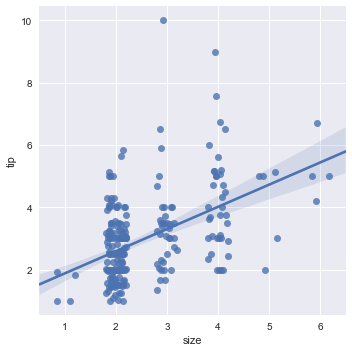

In [13]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.2)

方法2：离散取值上用均值和置信区间代替散点

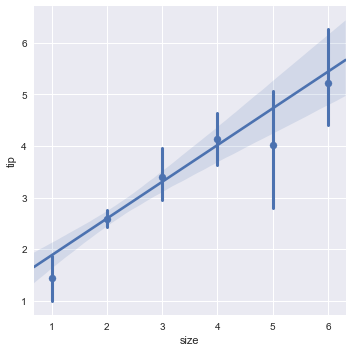

In [14]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

## 拟合不同模型
有些时候线性拟合效果不错，有些时候差强人意~

hue, col, row: strings #定义数据子集的变量，并在不同的图像子集中绘制

size: scalar, optional #定义子图的高度

markers: matplotlib marker code or list of marker codes, optional #定义散点的图标

col_wrap: int, optional #设置每行子图数量

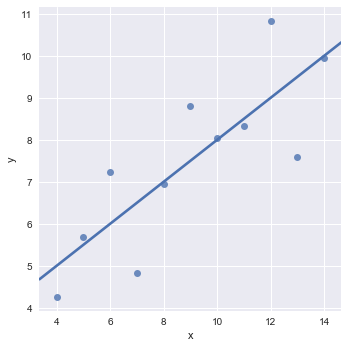

In [22]:
# 1973年统计学家Anscombe构造出的4组数据
# ci：confidence intervals
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None) # s表示size

In [87]:
type(anscombe)

pandas.core.frame.DataFrame

In [18]:
anscombe.query("dataset == 'I'")

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


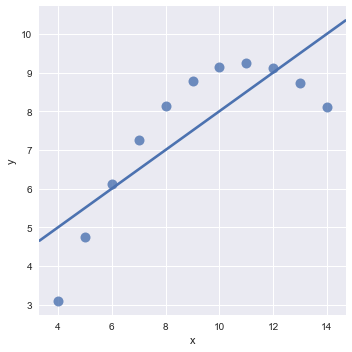

In [90]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 100})

In [23]:
help(sns.lmplot)

Help on function lmplot in module seaborn.linearmodels:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, size=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``col`` and ``row``. Ho

试试高阶拟合~

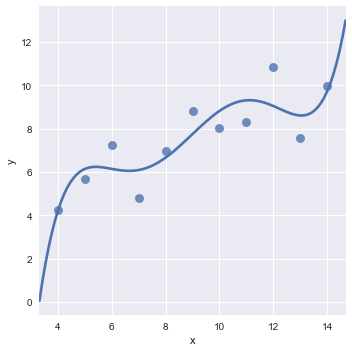

In [91]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), order=5, ci=None, scatter_kws={"s": 80})

异常值肿么办？

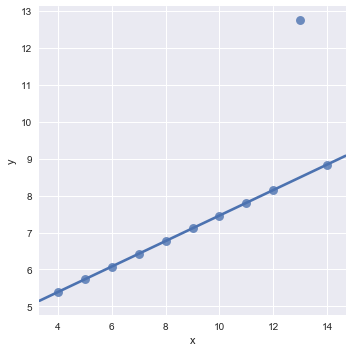

In [93]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80})

二值变量如何拟合？

In [94]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


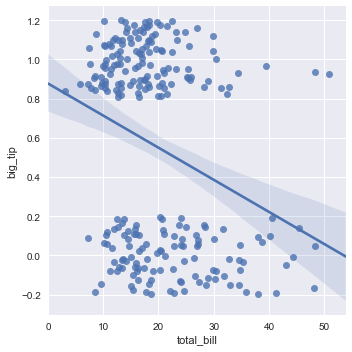

In [95]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15 # 比例超过15%的消费
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=0.2)

In [27]:
tips["big_tip"]

0      False
1       True
2       True
3      False
4      False
5       True
6       True
7      False
8      False
9       True
10      True
11     False
12     False
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21     False
22     False
23      True
24      True
25     False
26     False
27      True
28      True
29      True
       ...  
214     True
215    False
216    False
217    False
218     True
219    False
220     True
221     True
222     True
223     True
224    False
225     True
226     True
227    False
228     True
229    False
230    False
231     True
232     True
233    False
234     True
235    False
236    False
237    False
238    False
239     True
240    False
241    False
242    False
243     True
Name: big_tip, Length: 244, dtype: bool

尝试逻辑回归~
* $y = F(kx+b)$
* $F(x) = \frac{1}{1+e^{-x}}$

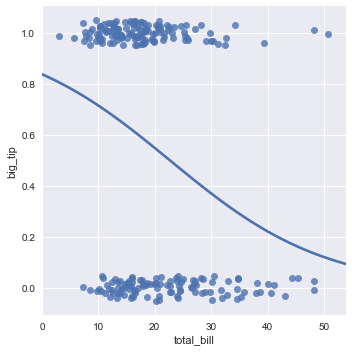

In [96]:
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.05, ci=None)

如何评价拟合效果？残差曲线~

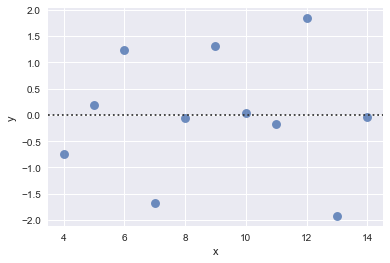

In [22]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), scatter_kws={"s": 80}) # residue plot

* 拟合的好，就是白噪声的分布$N(0,\sigma^2)$
* 拟合的差，就能看出一些模式

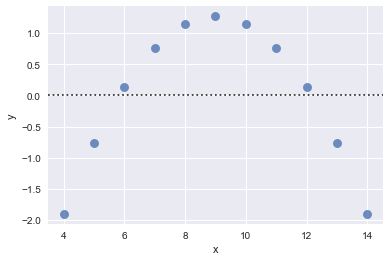

In [23]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), scatter_kws={"s": 80})

## 变量间的条件关系摸索

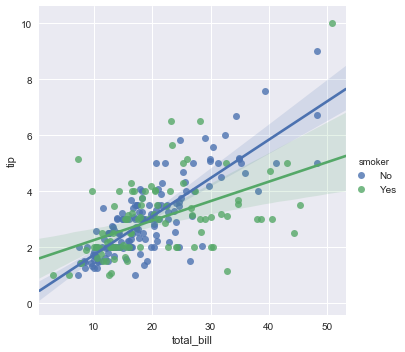

In [24]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

不抽烟的人似乎更喜欢给小费哦~

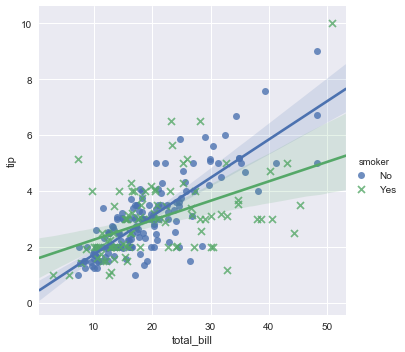

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"])

尝试增加更多的分类条件

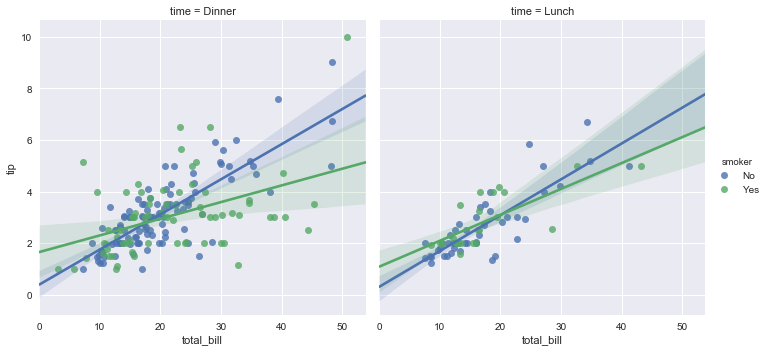

In [26]:
# col表示不同列
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips) # col: column

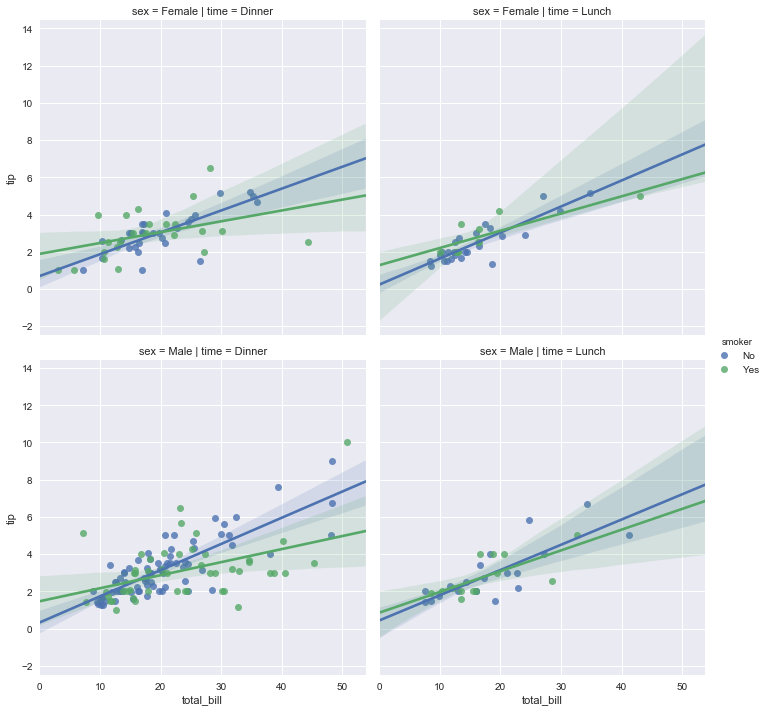

In [27]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips)

* 不抽烟的人给的小费更多
* 抽烟的人给的小费更分散
* 女性相比男性小费更分散

## 控制图片的大小和形状

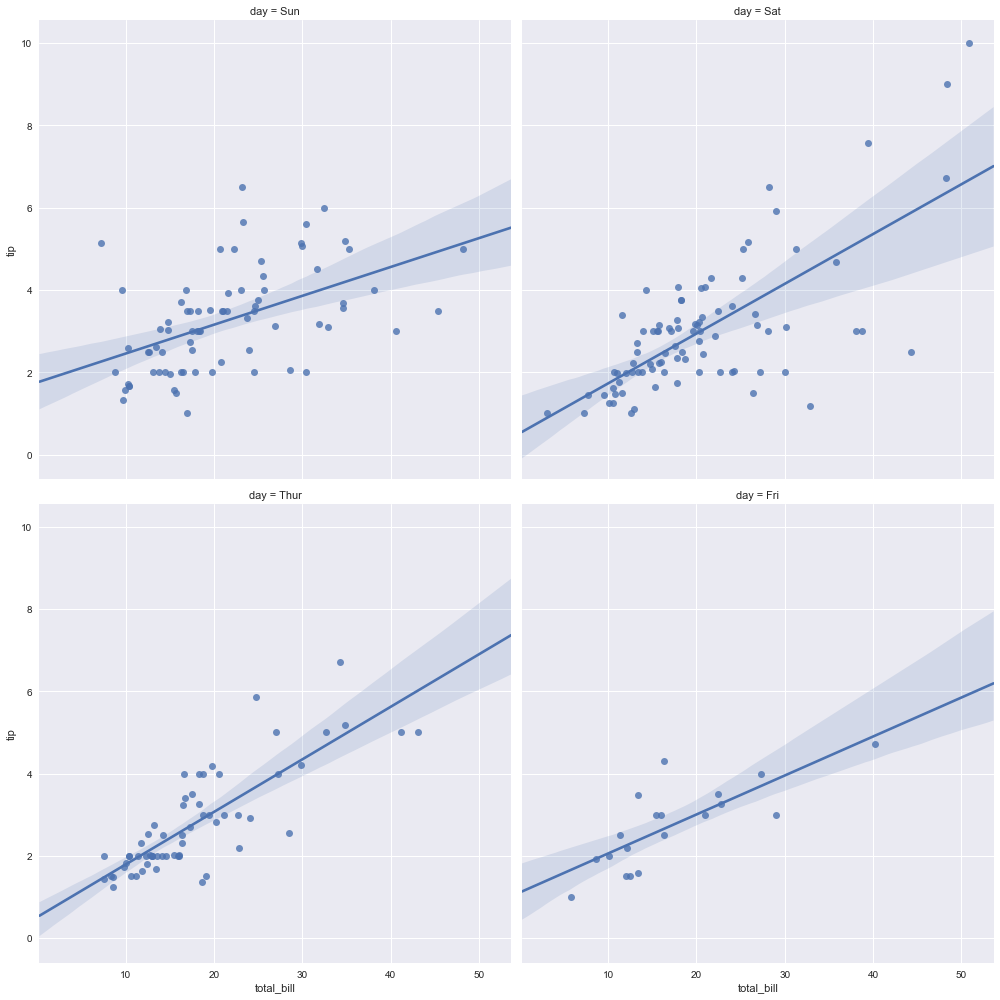

In [97]:
# col_wrap：控制每行多少个图
# size：控制图片高度（inch）
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, col_wrap=2, size=7) # col_wrap=1为什么会有问题？

看起来似乎周六比周日的小费更多哈~

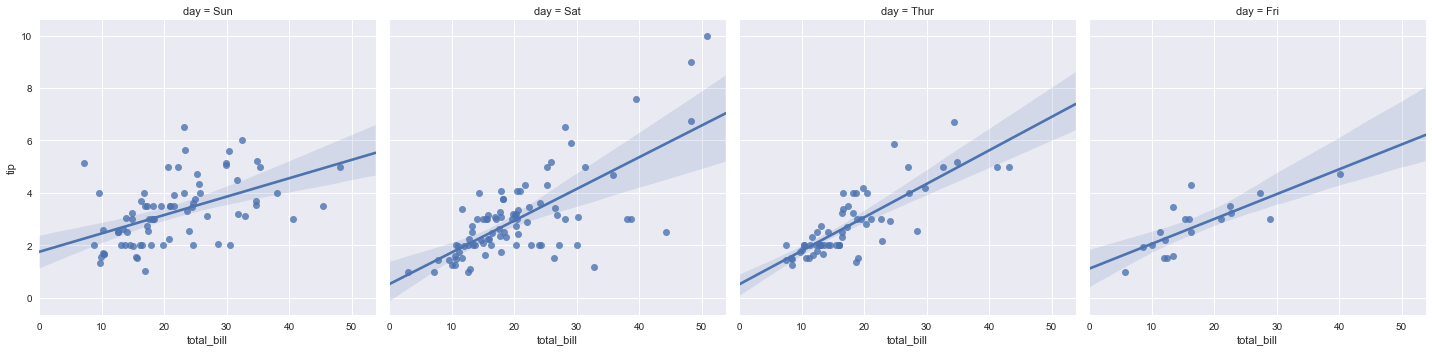

In [100]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=1) # aspect：控制切面的缩放比例

## 小结
* 拟合曲线：lmplot(x, y, data, ci, x_estimator, robust, logistic)
* 残差曲线：residplot()
* 子图绘制：lmplot(row, col)
* 尺寸控制：lmplot(col_wrap, size, aspect)

## 课后小题
* lmplot和regplot的区别

In [32]:
help(sns.regplot)

Help on function regplot in module seaborn.linearmodels:

regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model: ``order``, ``logistic``, ``lowess``, ``robust``, and
    ``logx``. See the parameter docs for more information on these options.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-f